In [1]:
from ground_roll import ground_roll

In [2]:
gr = ground_roll()

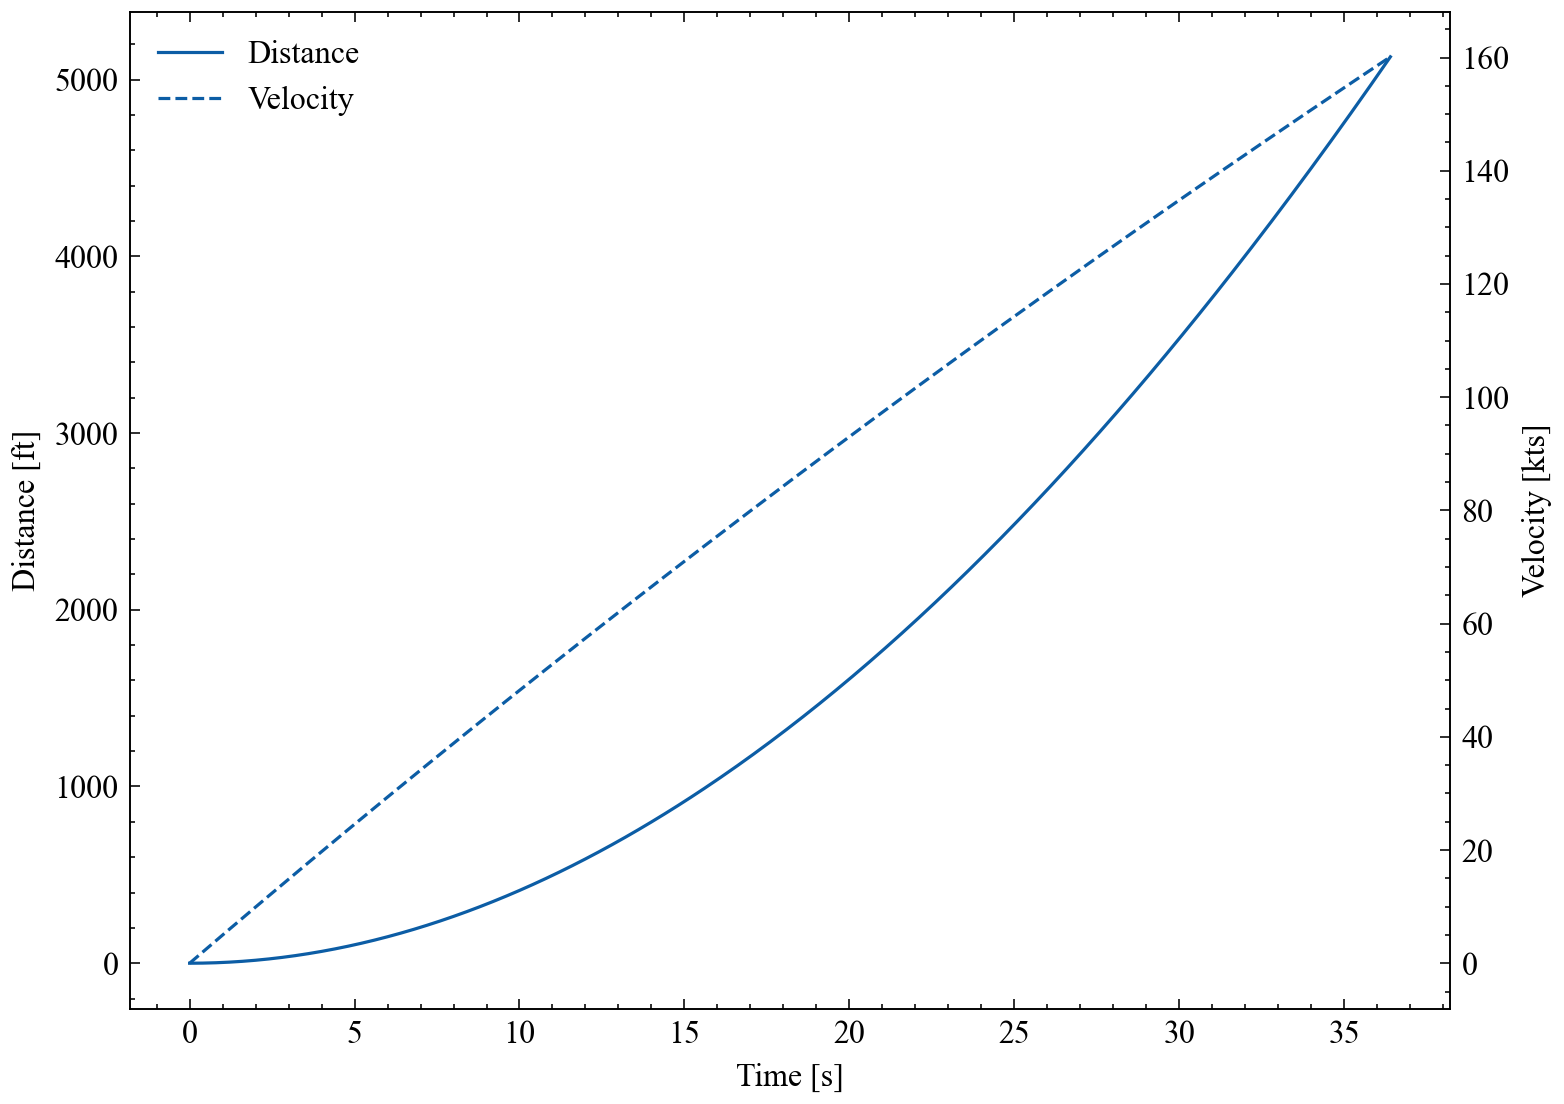

Final time:  36.4  s
Final distance:  5128.76  ft


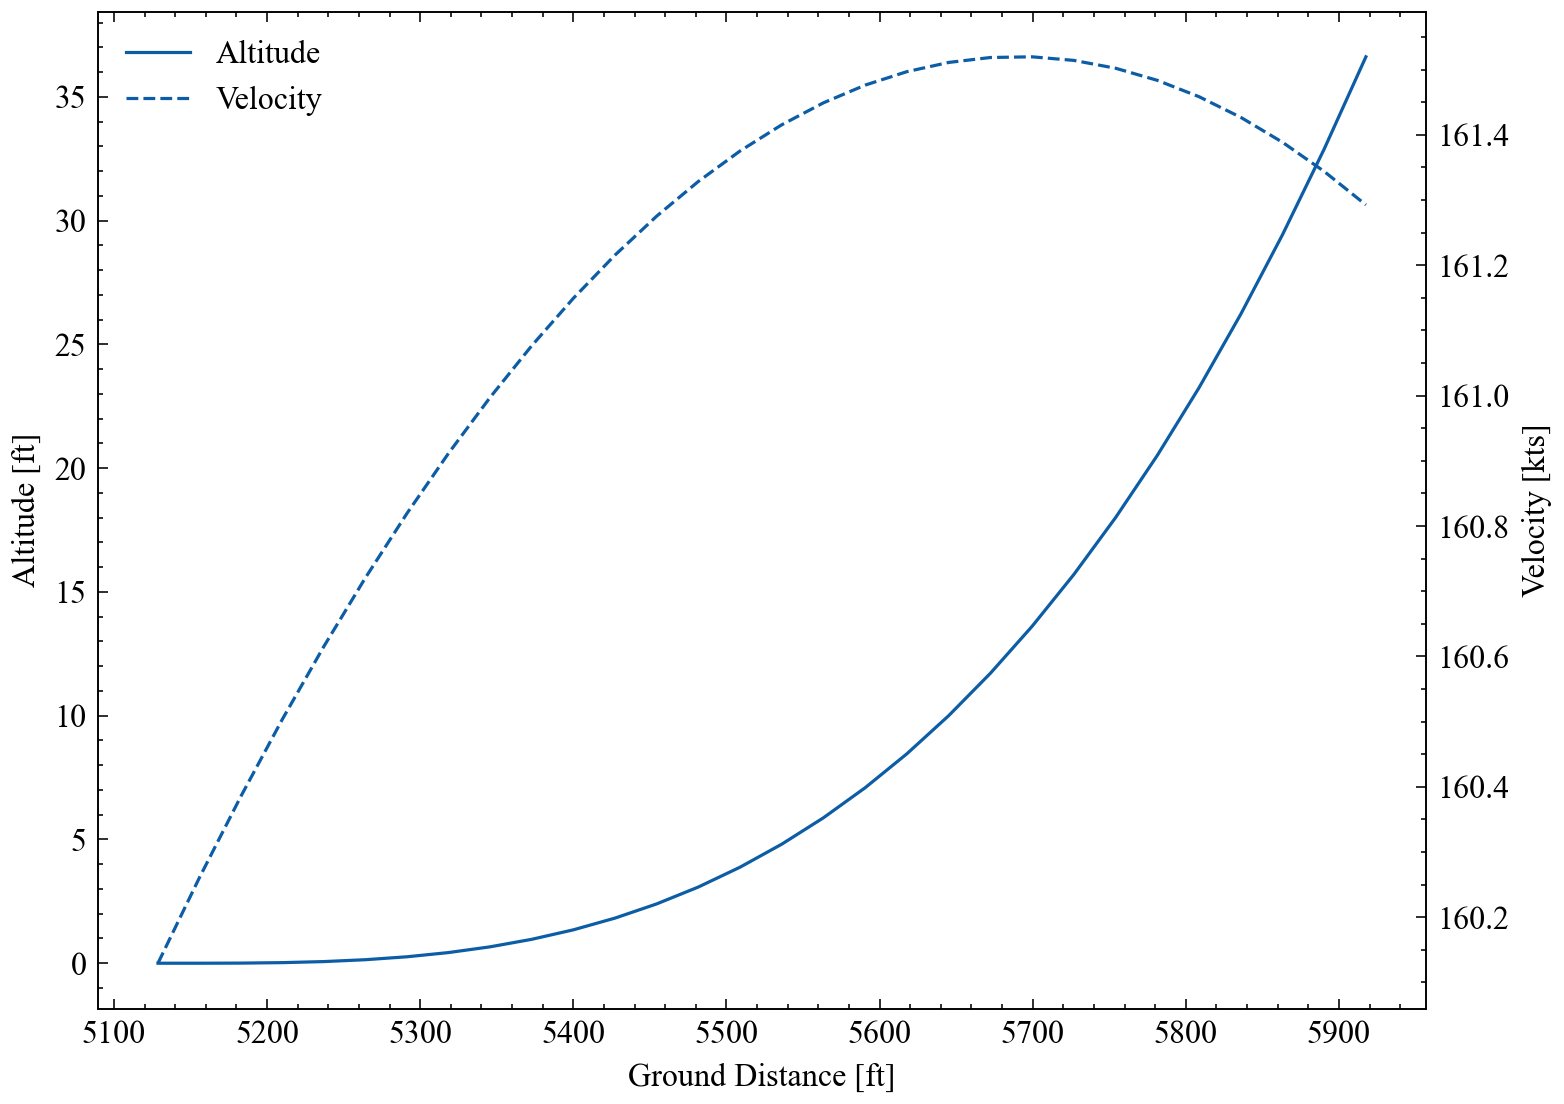

Final velocity:  161.29  kts
Final distance:  5917.62  ft


In [3]:
gr.no_wind()

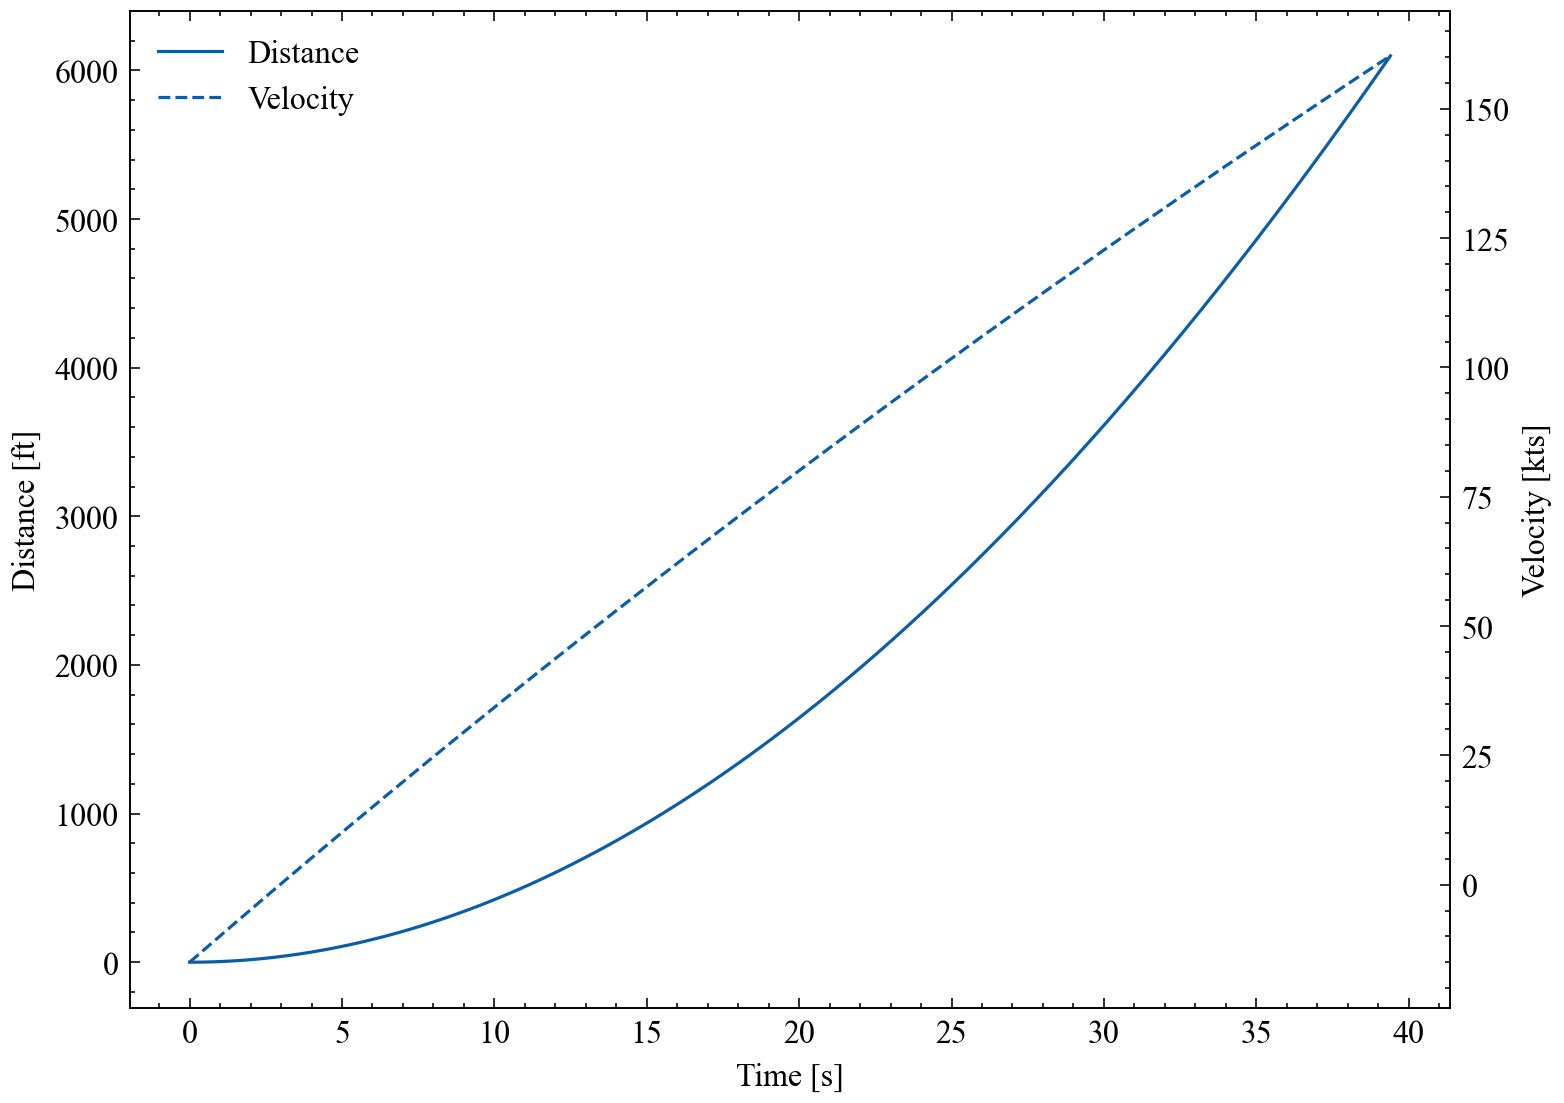

Final time:  39.4  s
Final distance:  6098.15  ft


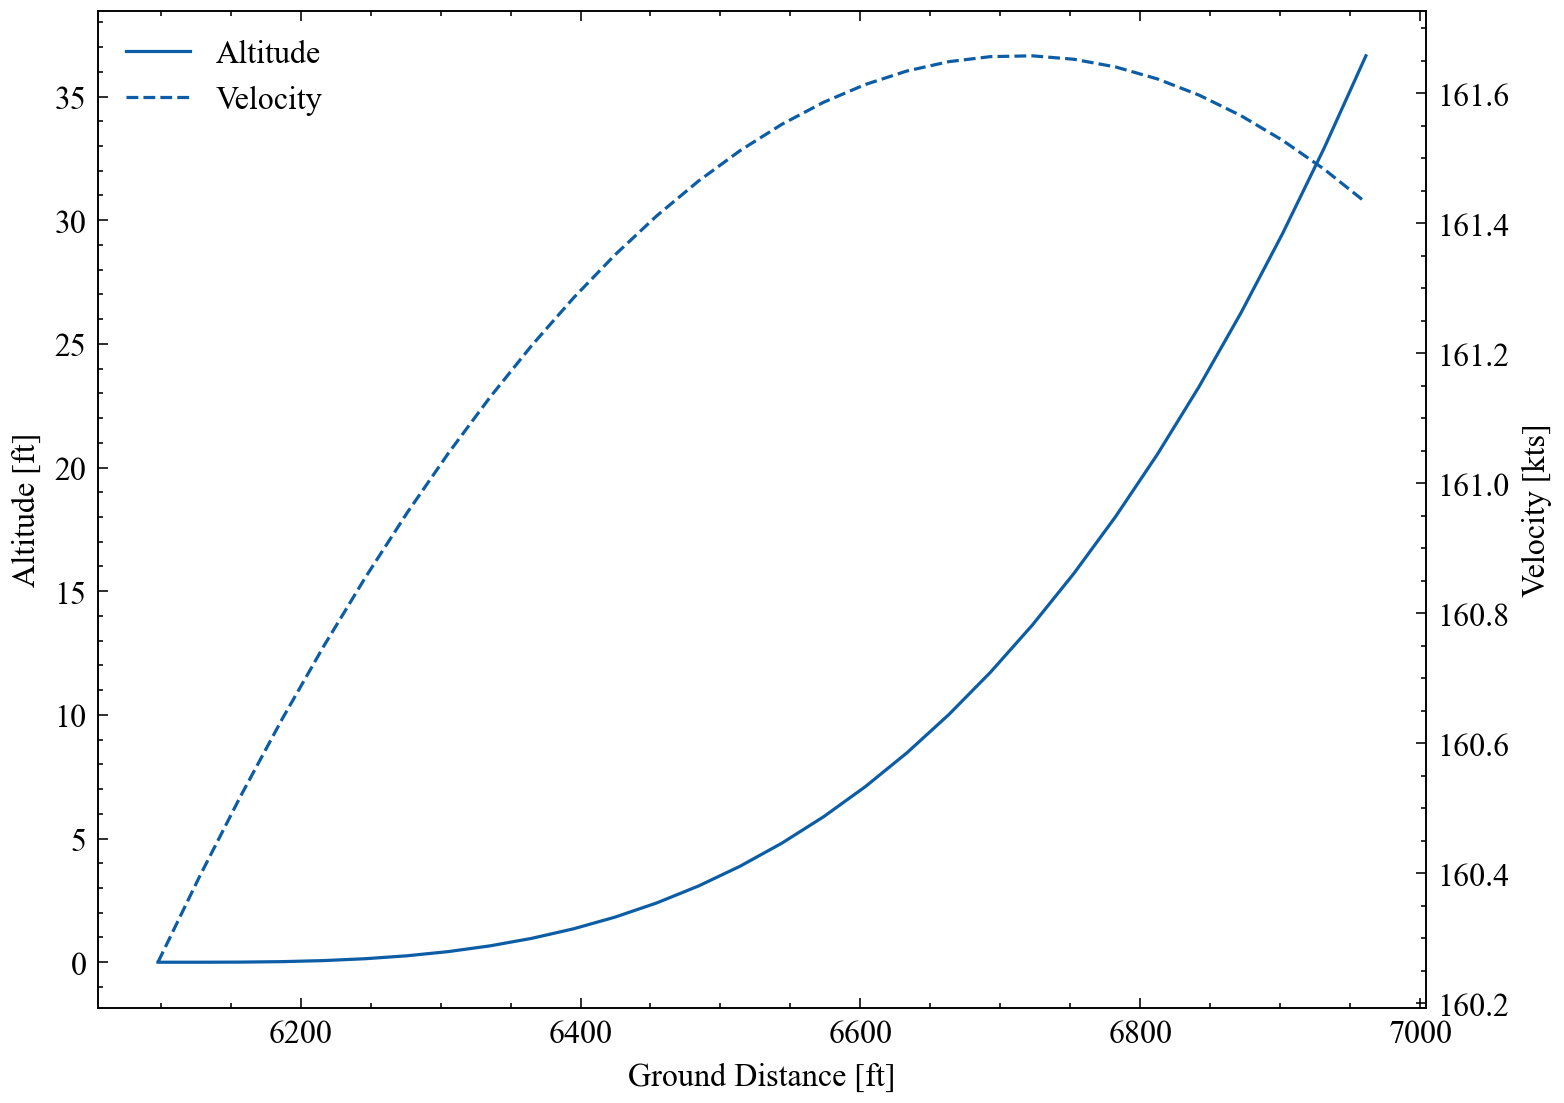

Final velocity:  161.43  kts
Final distance:  6961.09  ft


In [4]:
gr.wind()

In [5]:
print('Analytical approximation: ', gr.analytical_approx()*3.28084, ' ft')
print('Numerical integration:', gr.gr_distance[-1]*3.28084, ' ft')

Analytical approximation:  5465.192386290925  ft
Numerical integration: 5128.757595860957  ft


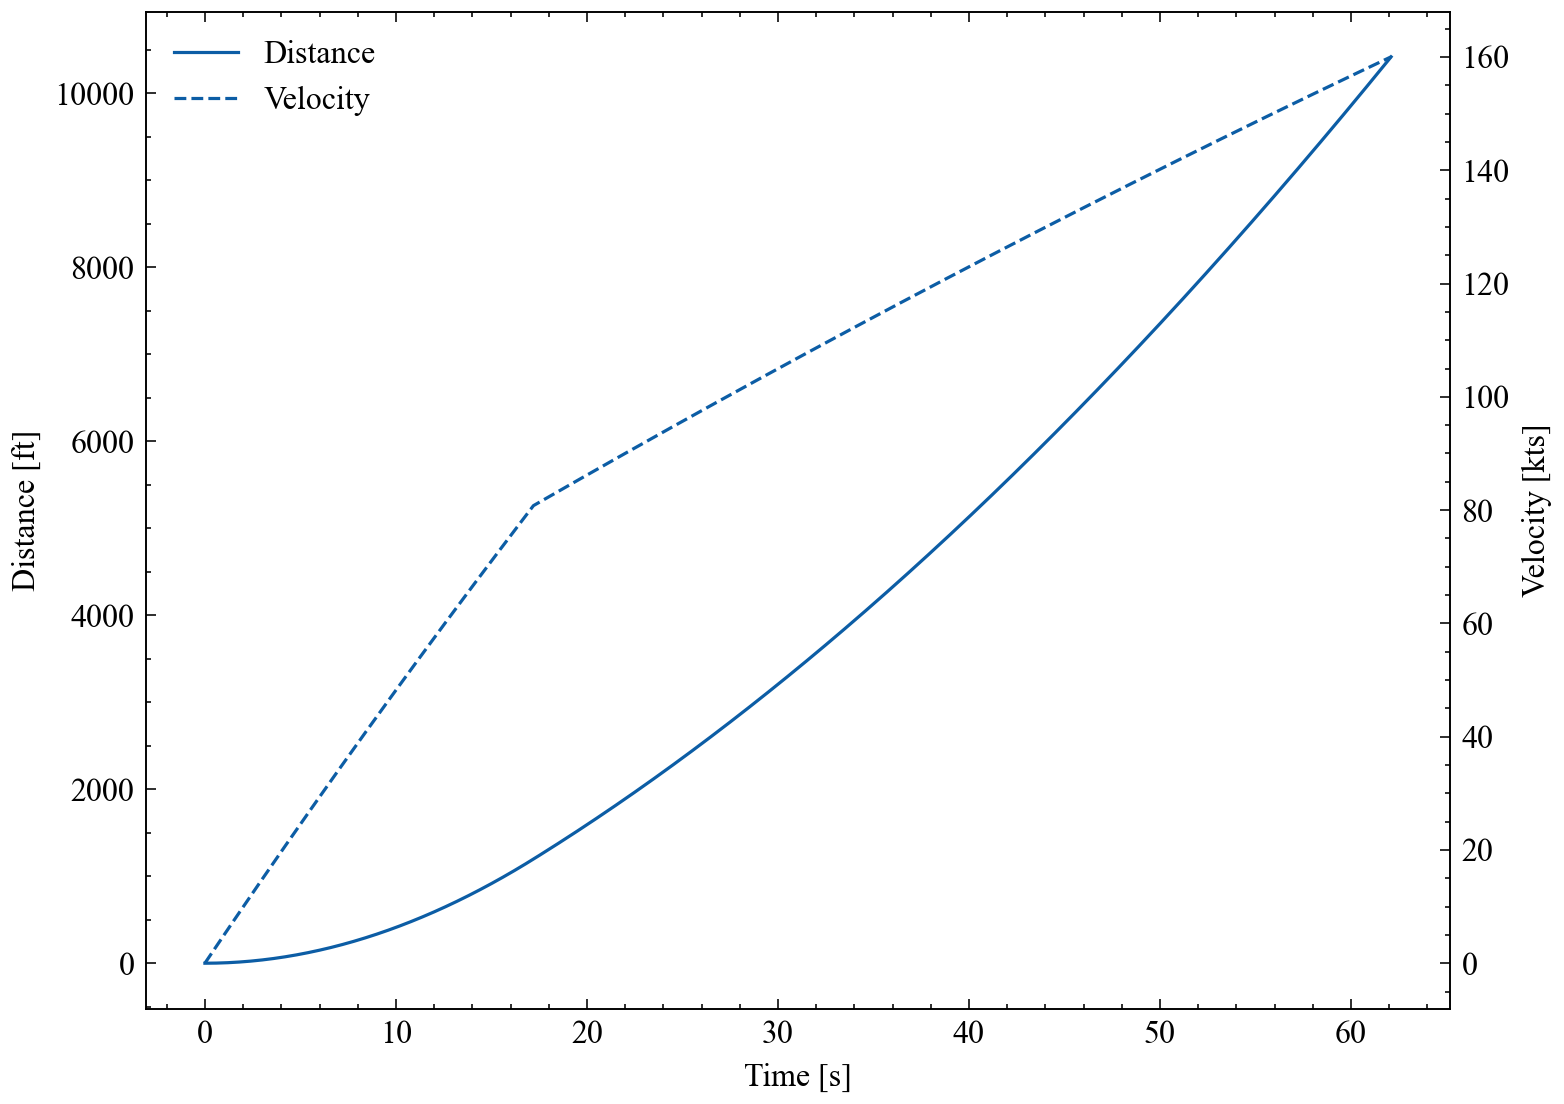

Final time:  62.1  s
Final distance:  10420.01  ft


In [6]:
gr.engine_loss()

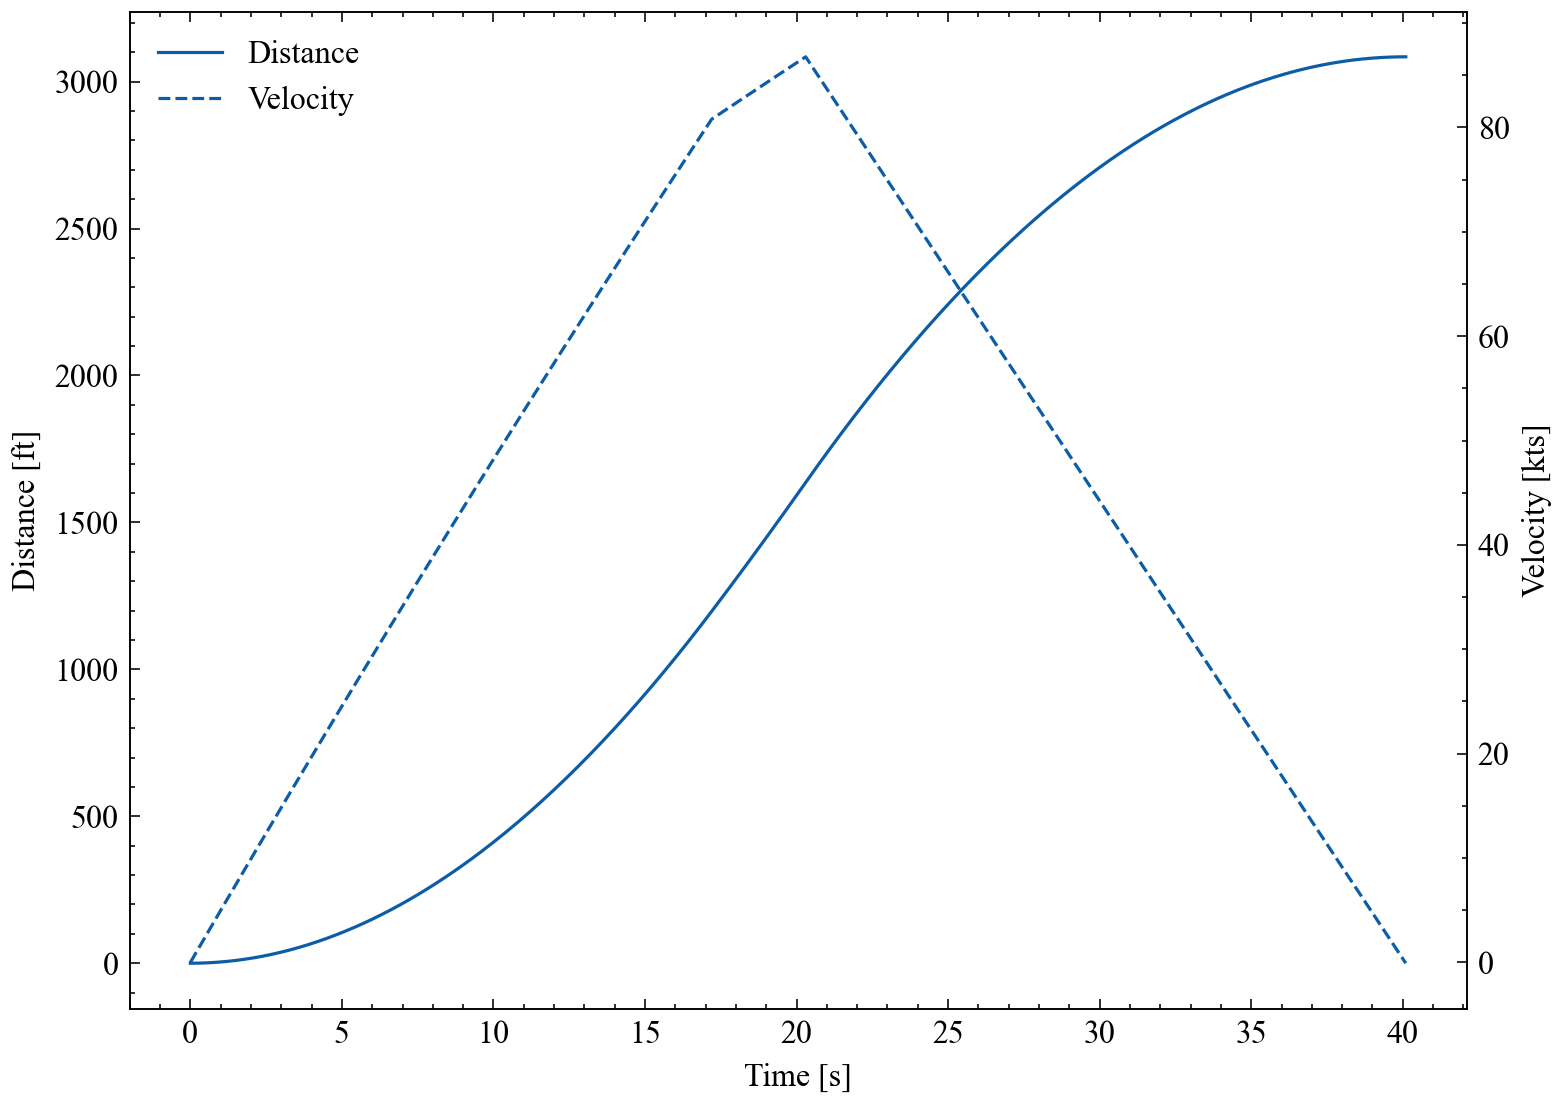

Final time:  40.1  s
Final distance:  3084.27  ft


In [7]:
gr.braking()